In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=30, centers=2, random_state=53)
X = (X - X.mean(axis=0)) / X.std(axis=0)

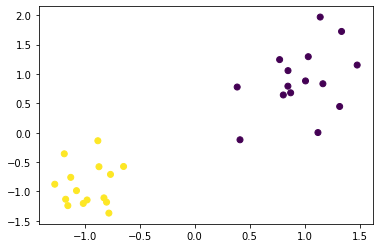

In [3]:
plt.scatter(*X.T, c=y)

## Projecting 2D data on a line

### x = 0

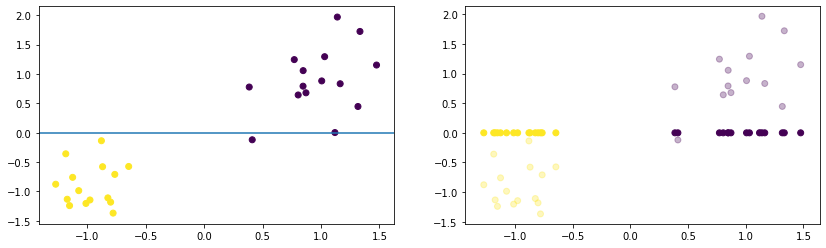

In [4]:
line = np.array([[1], [0]])
Xp = X @ line
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
ax[0].scatter(*X.T, c=y)
ax[0].axhline(0)
ax[1].scatter(Xp.ravel(), [0]*X.shape[0], c=y)
_ = ax[1].scatter(*X.T, c=y, alpha=0.3)


### y = 0

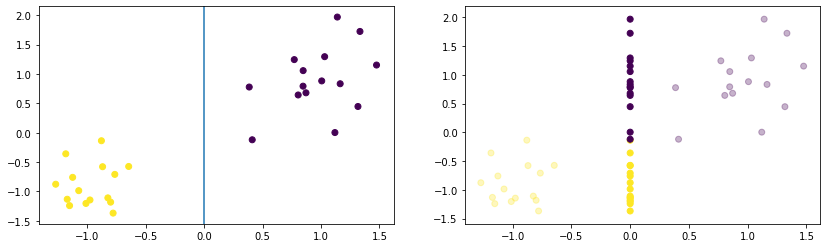

In [5]:
line = np.array([[0], [1]])
Xp = X @ line
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
ax[0].scatter(*X.T, c=y)
ax[0].axvline(0)
ax[1].scatter([0]*X.shape[0], Xp.ravel(), c=y)
_ = ax[1].scatter(*X.T, c=y, alpha=0.3)


### x = y

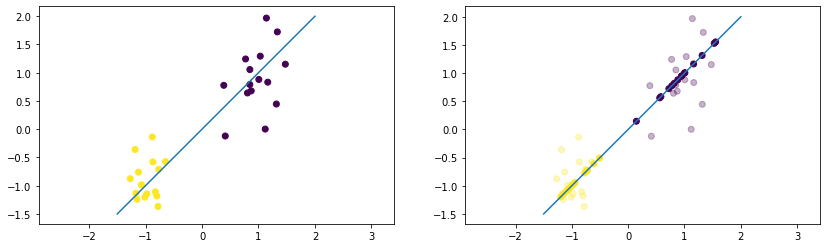

In [6]:
line = np.array([[0.707], [0.707]])
Xp = (X @ line) / line.sum()
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
ax[0].scatter(*X.T, c=y)
ax[0].plot([-1.5, 2], [-1.5, 2])
ax[1].scatter(Xp.ravel(), Xp.ravel(), c=y)
ax[1].scatter(*X.T, c=y, alpha=0.3)
ax[1].plot([-1.5, 2], [-1.5, 2])
# ax[0].set_xlim(-2, 2)
# ax[0].set_ylim(-2, 2)
ax[0].axis('equal')
_ = ax[1].axis('equal')


## Arbitrary Projection

In [7]:
from ipywidgets import interact

In [8]:
@interact
def buk(theta=(0.,np.pi,0.001)):
    line0 = np.cos(theta)
    line1 = np.sin(theta)
    line = np.array([[line0], [line1]])
    m = np.array([[line0, 0], [0, line1]])
    Xf = (X @ line).ravel()
#     print(Xf)
    Xp = np.array([Xf*line0, Xf*line1]).T
#     print(Xp)
    fig, ax = plt.subplots(1, 2, figsize=(14, 4))
    
    ax[0].scatter(*X.T, c=y)
    ax[1].scatter(*Xp.T, c=y)
    ax[1].scatter(*X.T, c=y, alpha=0.3)
    
    
    h = np.array([[-2, -2], [2, 2]])
    z = h@m
    ax[1].plot(*z.T)
    ax[0].axis('equal')
    _ = ax[1].axis('equal')

interactive(children=(FloatSlider(value=1.57, description='theta', max=3.141592653589793, step=0.001), Output(…